In [4]:
import pandas as pd
df = pd.read_csv('./HepatitisCdata.csv')
df.shape

(615, 14)

In [5]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

## limpeza da base
focando em dicernir se o paciente pode ser um doador de sangue ou não pode ser um doador de sangue, vamos limpar a base e normalizar os dados targets entre:
- "1" não pode doar sangue
- "0" pode doar sangue


In [7]:
# normalização de variáveis categóricas
# blood donor será 1, qualquer outro registro será 0
df['Category'] = df['Category'].apply(lambda x: 0 if x == '0=Blood Donor' else 1)
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})

# vamos dropar a coluna de id visto que não é um dado importante ou relevante para o modelo
df = df.drop(columns=['Unnamed: 0'])

In [8]:
# verificando a quantidade de doadores e não doadores
df['Category'].value_counts()

Category
0    533
1     82
Name: count, dtype: int64

In [9]:
# checagem de valores nulos
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

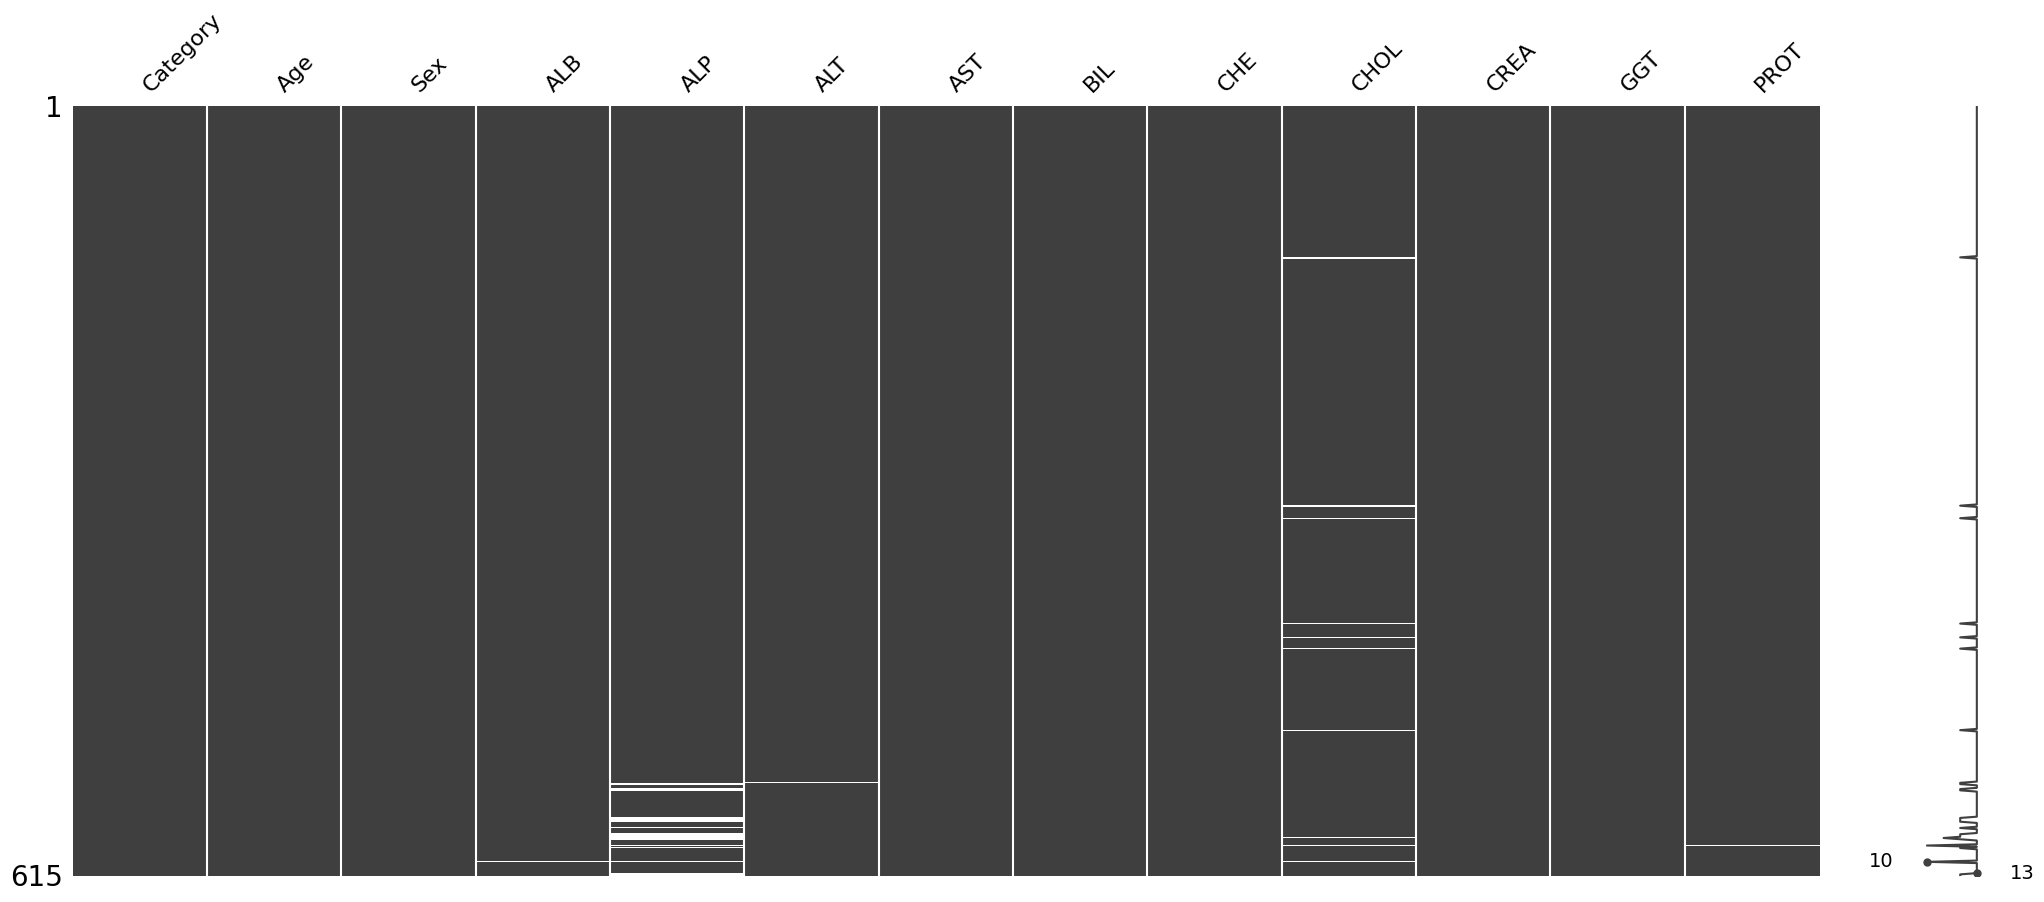

In [10]:
import missingno as msno

# Visualizar os nulos com missingno
msno.matrix(df)

# Como temos poucos valores nulos, podemos optar por preencher com a mediana das colunas numéricas
df = df.fillna(df.median(numeric_only=True))


# vizualização gráfica dos dados


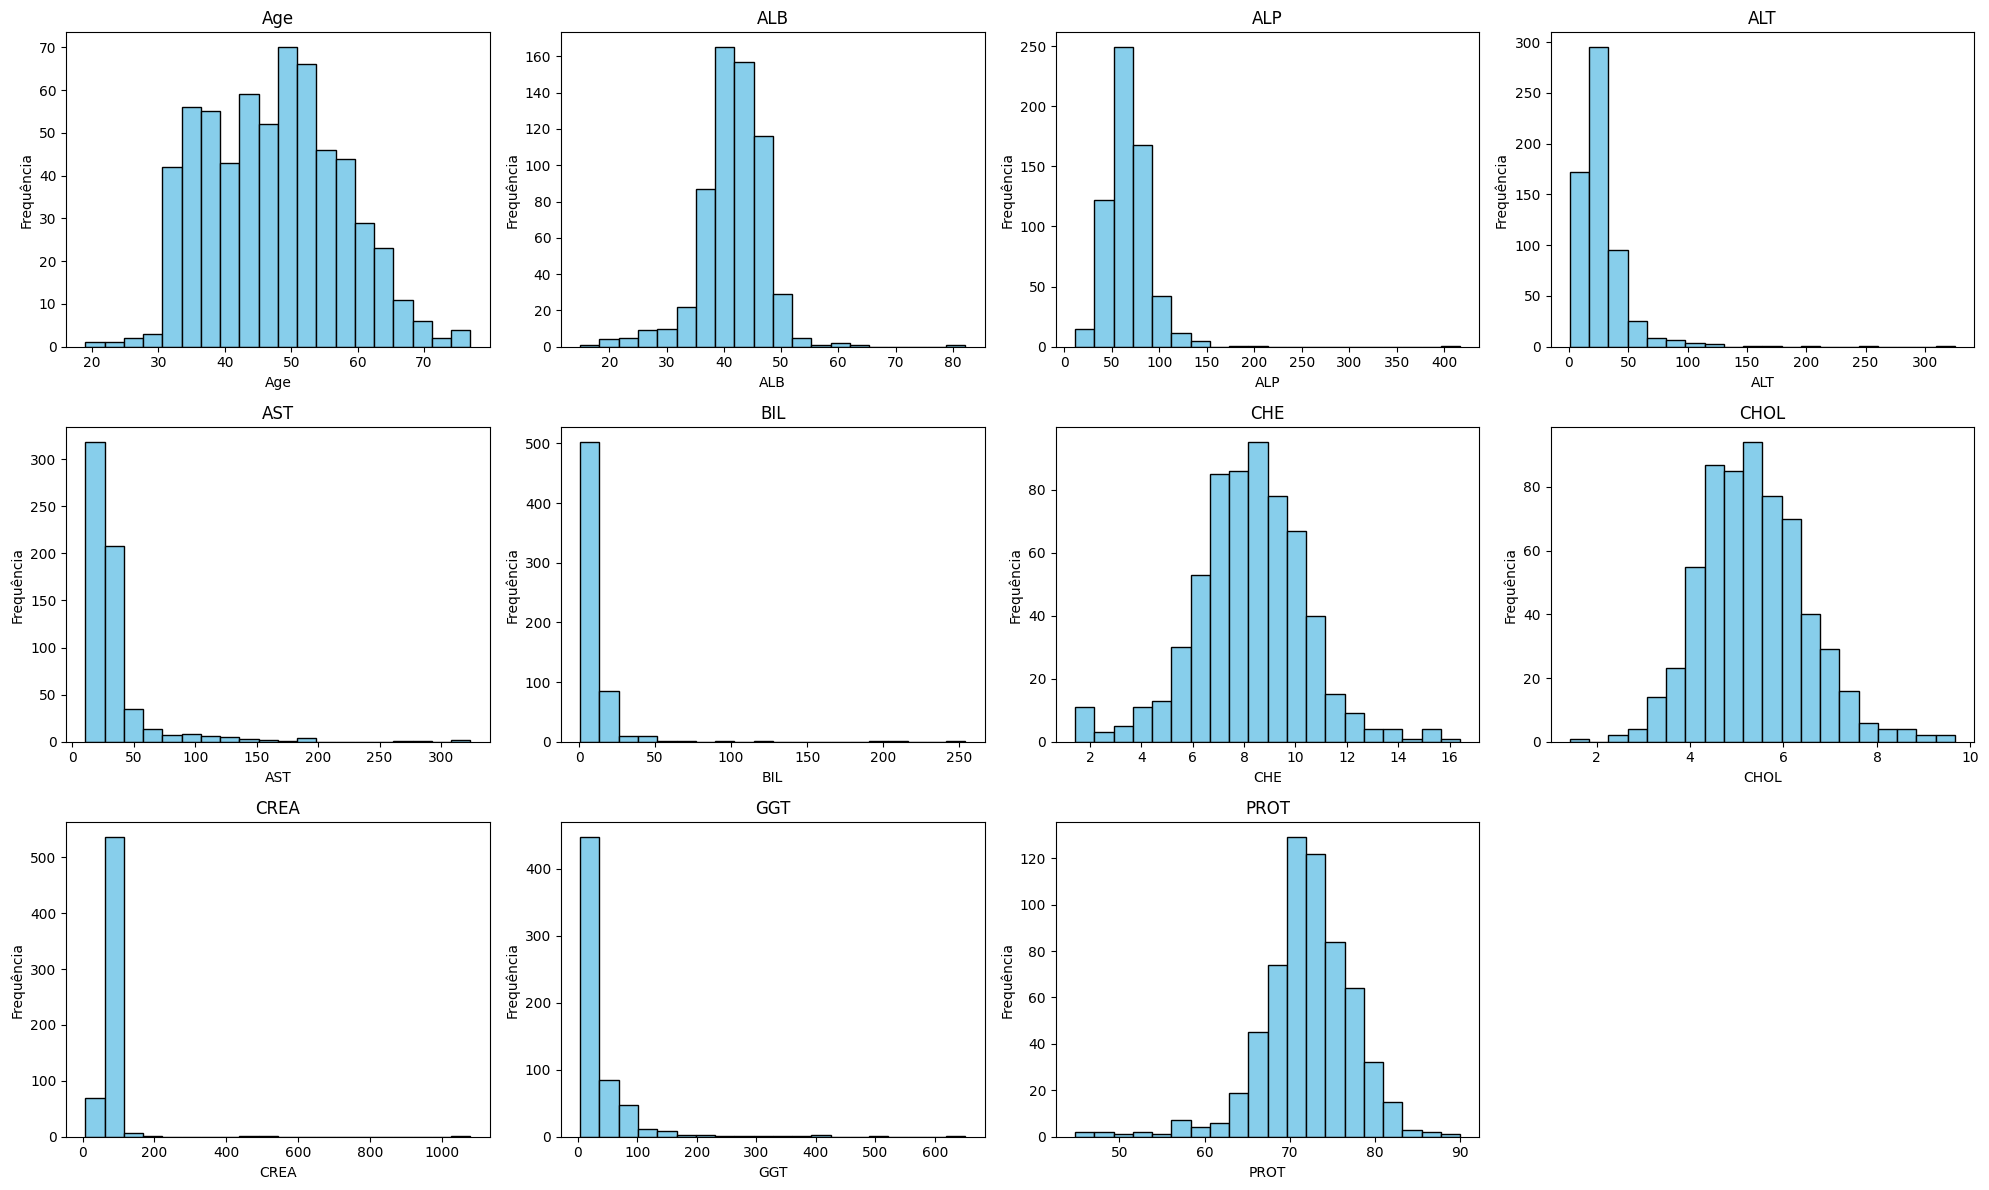

In [11]:
import matplotlib.pyplot as plt

# Seleciona apenas as colunas numéricas, desconsiderando 'Category' e 'Sex'
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ['Category', 'Sex']]

num_cols = len(numeric_cols)
fig, axes = plt.subplots(3, (num_cols + 2) // 3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequência')
    axes[i].set_xlabel(col)

# Remove subplots vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

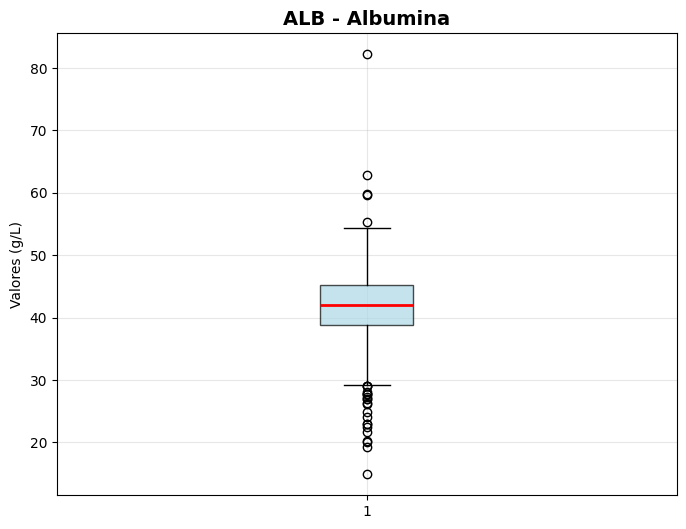

📊 ALB - Albumina
• Descrição: Principal proteína do plasma sanguíneo, produzida pelo fígado
• Significado: Níveis baixos podem indicar problemas hepáticos, renais ou desnutrição
• Faixa Normal: 35-50 g/L


In [12]:
# ALB - Albumina
plt.figure(figsize=(8, 6))
plt.boxplot(df['ALB'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('ALB - Albumina', fontsize=14, fontweight='bold')
plt.ylabel('Valores (g/L)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 ALB - Albumina")
print("• Descrição: Principal proteína do plasma sanguíneo, produzida pelo fígado")
print("• Significado: Níveis baixos podem indicar problemas hepáticos, renais ou desnutrição")
print("• Faixa Normal: 35-50 g/L")

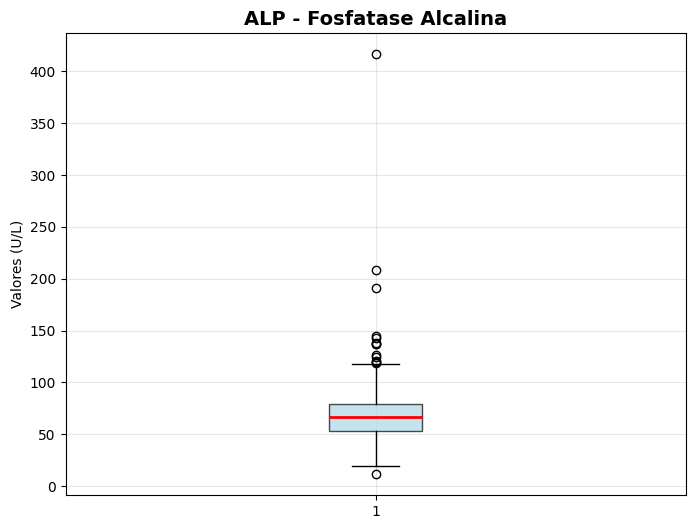

📊 ALP - Fosfatase Alcalina
• Descrição: Enzima relacionada ao fígado, ossos e vias biliares
• Significado: Alterações podem indicar problemas metabólicos
• Faixa Normal: 44-147 U/L


In [13]:
# ALP - Fosfatase Alcalina
plt.figure(figsize=(8, 6))
plt.boxplot(df['ALP'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('ALP - Fosfatase Alcalina', fontsize=14, fontweight='bold')
plt.ylabel('Valores (U/L)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 ALP - Fosfatase Alcalina")
print("• Descrição: Enzima relacionada ao fígado, ossos e vias biliares")
print("• Significado: Alterações podem indicar problemas metabólicos")
print("• Faixa Normal: 44-147 U/L")

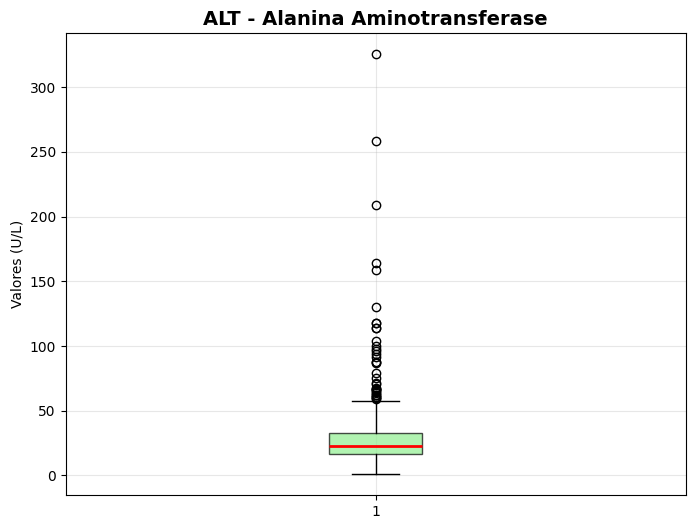

📊 ALT - Alanina Aminotransferase
• Descrição: Enzima hepática específica
• Significado: Marcador sensível de lesão hepática
• Faixa Normal: 7-56 U/L


In [14]:
# ALT - Alanina Aminotransferase
plt.figure(figsize=(8, 6))
plt.boxplot(df['ALT'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightgreen', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('ALT - Alanina Aminotransferase', fontsize=14, fontweight='bold')
plt.ylabel('Valores (U/L)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 ALT - Alanina Aminotransferase")
print("• Descrição: Enzima hepática específica")
print("• Significado: Marcador sensível de lesão hepática")
print("• Faixa Normal: 7-56 U/L")

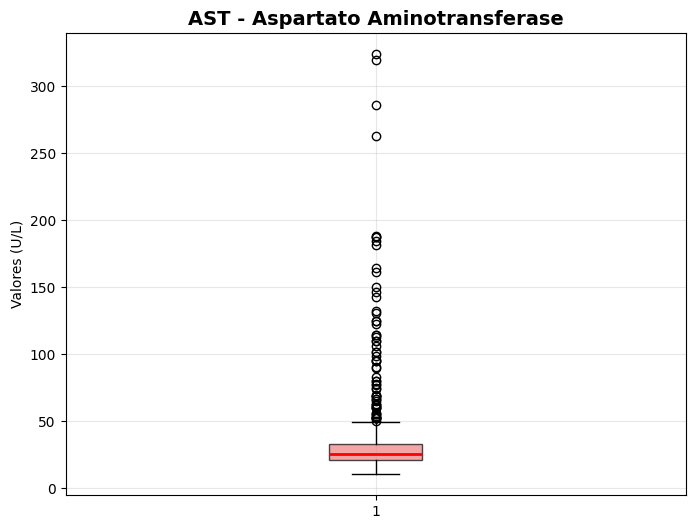

📊 AST - Aspartato Aminotransferase
• Descrição: Enzima presente no fígado e outros tecidos
• Significado: Indica danos hepáticos e cardíacos
• Faixa Normal: 10-40 U/L


In [15]:
# AST - Aspartato Aminotransferase
plt.figure(figsize=(8, 6))
plt.boxplot(df['AST'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightcoral', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('AST - Aspartato Aminotransferase', fontsize=14, fontweight='bold')
plt.ylabel('Valores (U/L)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 AST - Aspartato Aminotransferase")
print("• Descrição: Enzima presente no fígado e outros tecidos")
print("• Significado: Indica danos hepáticos e cardíacos")
print("• Faixa Normal: 10-40 U/L")

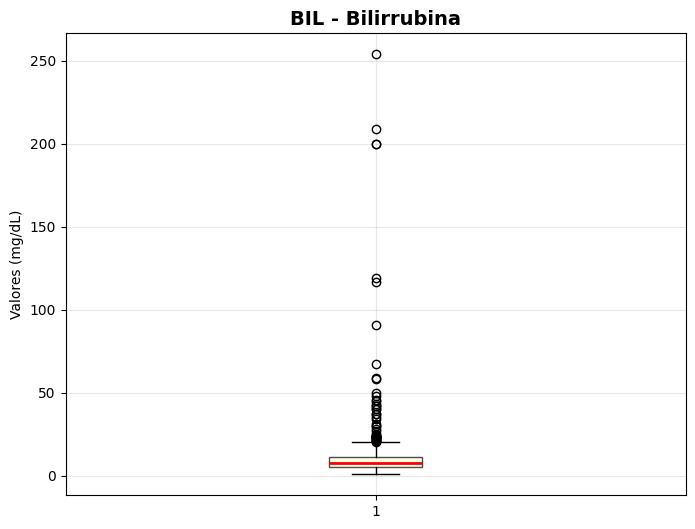

📊 BIL - Bilirrubina
• Descrição: Pigmento resultante da degradação da hemoglobina
• Significado: Indicador de função hepática e biliar
• Faixa Normal: 0.1-1.2 mg/dL


In [16]:
# BIL - Bilirrubina
plt.figure(figsize=(8, 6))
plt.boxplot(df['BIL'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightyellow', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('BIL - Bilirrubina', fontsize=14, fontweight='bold')
plt.ylabel('Valores (mg/dL)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 BIL - Bilirrubina")
print("• Descrição: Pigmento resultante da degradação da hemoglobina")
print("• Significado: Indicador de função hepática e biliar")
print("• Faixa Normal: 0.1-1.2 mg/dL")

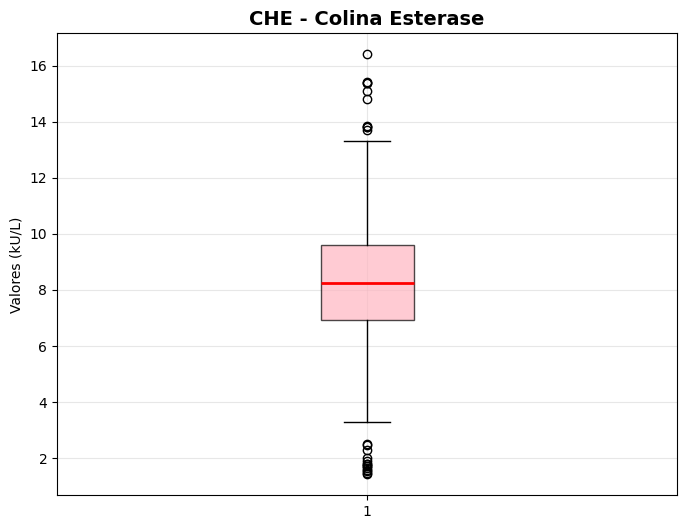

📊 CHE - Colina Esterase
• Descrição: Enzima produzida no fígado
• Significado: Avalia função hepática sintética
• Faixa Normal: 4.62-11.5 kU/L


In [17]:
# CHE - Colina Esterase
plt.figure(figsize=(8, 6))
plt.boxplot(df['CHE'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightpink', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('CHE - Colina Esterase', fontsize=14, fontweight='bold')
plt.ylabel('Valores (kU/L)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 CHE - Colina Esterase")
print("• Descrição: Enzima produzida no fígado")
print("• Significado: Avalia função hepática sintética")
print("• Faixa Normal: 4.62-11.5 kU/L")

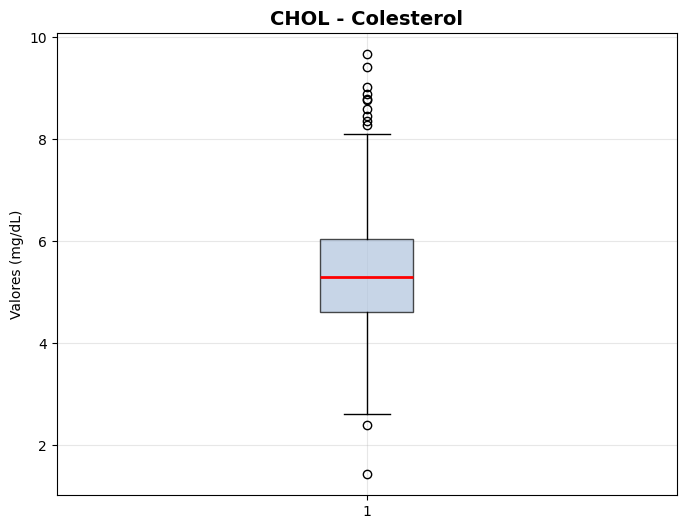

📊 CHOL - Colesterol
• Descrição: Tipo de gordura no sangue
• Significado: Fator de risco cardiovascular
• Faixa Normal: <200 mg/dL


In [18]:
# CHOL - Colesterol
plt.figure(figsize=(8, 6))
plt.boxplot(df['CHOL'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightsteelblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('CHOL - Colesterol', fontsize=14, fontweight='bold')
plt.ylabel('Valores (mg/dL)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 CHOL - Colesterol")
print("• Descrição: Tipo de gordura no sangue")
print("• Significado: Fator de risco cardiovascular")
print("• Faixa Normal: <200 mg/dL")


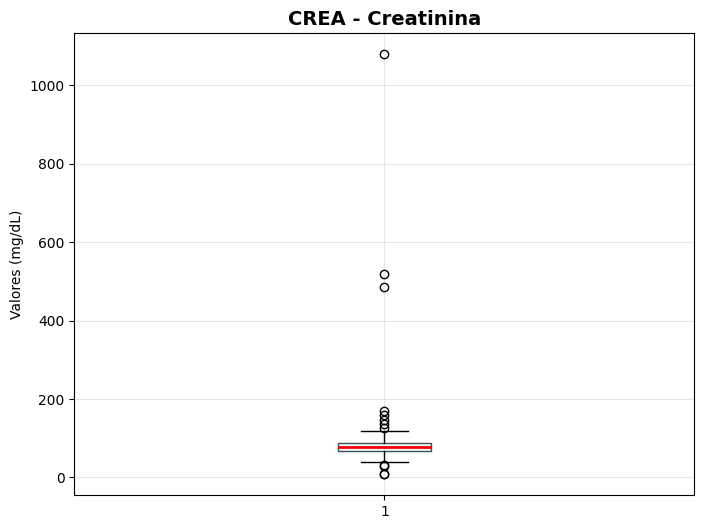

📊 CREA - Creatinina
• Descrição: Produto da degradação muscular
• Significado: Avalia função renal
• Faixa Normal: 0.6-1.2 mg/dL


In [19]:
# CREA - Creatinina
plt.figure(figsize=(8, 6))
plt.boxplot(df['CREA'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightcyan', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('CREA - Creatinina', fontsize=14, fontweight='bold')
plt.ylabel('Valores (mg/dL)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 CREA - Creatinina")
print("• Descrição: Produto da degradação muscular")
print("• Significado: Avalia função renal")
print("• Faixa Normal: 0.6-1.2 mg/dL")


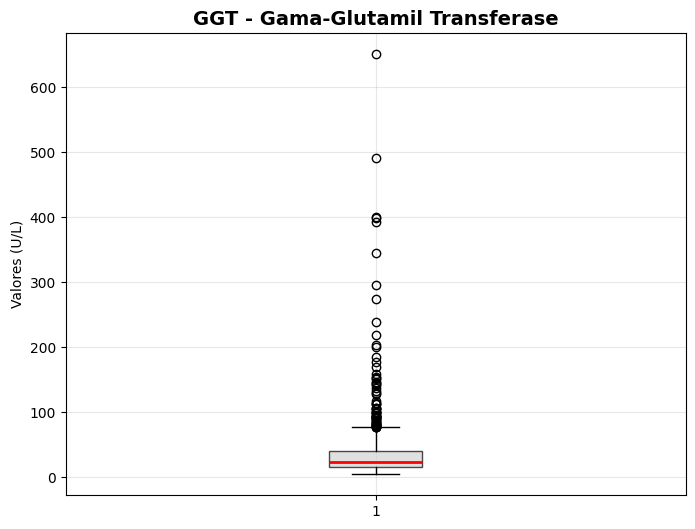

📊 GGT - Gama-Glutamil Transferase
• Descrição: Enzima hepática
• Significado: Indica lesão hepática ou consumo de álcool
• Faixa Normal: 9-48 U/L


In [20]:
# GGT - Gama-Glutamil Transferase
plt.figure(figsize=(8, 6))
plt.boxplot(df['GGT'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightgray', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('GGT - Gama-Glutamil Transferase', fontsize=14, fontweight='bold')
plt.ylabel('Valores (U/L)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 GGT - Gama-Glutamil Transferase")
print("• Descrição: Enzima hepática")
print("• Significado: Indica lesão hepática ou consumo de álcool")
print("• Faixa Normal: 9-48 U/L")


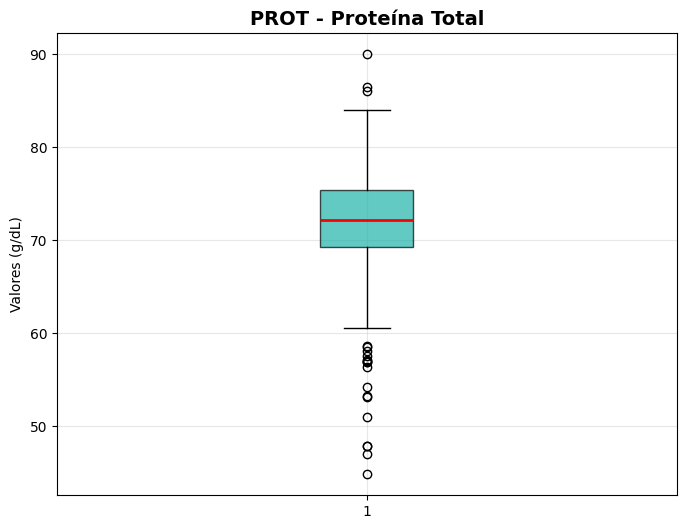

📊 PROT - Proteína Total
• Descrição: Quantidade total de proteínas no sangue
• Significado: Indica função hepática e renal
• Faixa Normal: 6.0-8.3 g/dL


In [21]:
# PROT - Proteína Total
plt.figure(figsize=(8, 6))
plt.boxplot(df['PROT'].dropna(), patch_artist=True, 
           boxprops=dict(facecolor='lightseagreen', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
plt.title('PROT - Proteína Total', fontsize=14, fontweight='bold')
plt.ylabel('Valores (g/dL)')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 PROT - Proteína Total")
print("• Descrição: Quantidade total de proteínas no sangue")
print("• Significado: Indica função hepática e renal")
print("• Faixa Normal: 6.0-8.3 g/dL")


# Contexto clínico:
O padrão que se observa é que várias de nossas features tem muito outliers o que é comum em pacientes com doença ativa, eles tendem a aprensetar altos níveis enzimáticos muito acima ou abaixo da normalidade, o que justifica os valores

Vamos fazer um mapa de correlação para observar como cada feature se conversa

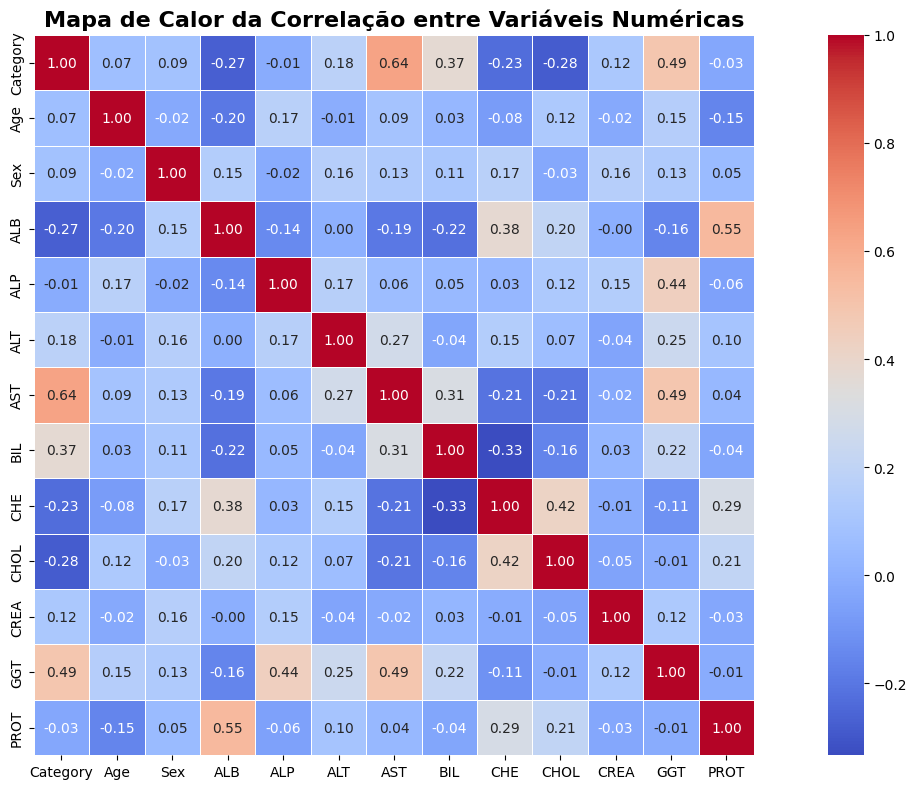

In [22]:
# Análise de Correlação
import seaborn as sns

# Seleciona apenas as colunas numéricas para calcular a correlação
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correlação de Pearson
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Interpretação
 Considerando:
 - Category: 0 = saudável, 1 = doente.

 1. **Category vs AST (+0.64)**:
    - Correlação positiva forte: AST mais elevado está associado à condição de doença (Category = 1).
    - Ou seja, conforme a categoria passa para “doente”, o valor de AST tende a aumentar, o que condiz com esperado clinicamente (AST pode se elevar em lesão/dano hepático).

 2. **Category vs GGT (+0.49)**:
    - Correlação positiva moderada: GGT também aumenta substancialmente em pessoas doentes (Category = 1), sendo um marcador hepático sensível a lesão ou consumo de álcool.

 3. **Category vs BIL (+0.37)**:
    - Correlação positiva moderada: Maior bilirrubina total associada ao status de doença, consistente com quadros hepáticos em que há aumento da BIL.

 4. **Category vs ALB (-0.27)**:
    - Correlação negativa moderada: Níveis maiores de albumina tendem a aparecer nos saudáveis (Category = 0), enquanto pessoas doentes apresentam redução dessa proteína – esperado em doenças hepáticas crônicas.

 5. **Category vs CHE, CHOL, PROT**:
    - `CHE` (Colinesterase): Correlação negativa (-0.23), ou seja, valores menores de CHE são observados na doença, compatível com comprometimento hepático.
    - `CHOL` (Colesterol): Correlação negativa moderada (-0.28), indicando que níveis mais baixos de colesterol aparecem nos indivíduos doentes.
    - `PROT`: Correlação próxima de zero (-0.03), sugerindo pouca relação entre proteína total e a classificação saudável/doente neste conjunto de dados.



# Criando modelos de machine learning
Vamos começar a fazer a criação de alguns modelos usando os demais algoritmos de machine learning e compara-los para ver qual seria o melhor algorítimo para o caso

## Arvore de Decisão

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pré-processamento
# Remove colunas irrelevantes e prepara X e y
X = df.drop(['Category', 'Sex'], axis=1)
y = df['Category']

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standart Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predições
y_pred = clf.predict(X_test_scaled)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Para evitar TypeError, garanta que target_names é uma lista/array de strings
# le.classes_ possivelmente contém strings, mas para garantir:
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.943089430894309

Matriz de Confusão:
 [[103   4]
 [  3  13]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       107
           1       0.76      0.81      0.79        16

    accuracy                           0.94       123
   macro avg       0.87      0.89      0.88       123
weighted avg       0.94      0.94      0.94       123




✅ **Pontos Fortes:**
- 96.3% dos doadores saudáveis são aprovados
- 81.3% dos casos problemáticos são detectados
- Boa precisão geral (94.3%)
- Balanceamento razoável entre classes

⚠️ **Pontos de Atenção:**
- 18.8% dos casos doentes passam despercebidos
- 3 casos críticos podem comprometer segurança
- 3.7% de rejeição desnecessária


## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Treinando o modelo KNN
# tentei com 5 ficou bem ruim
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_knn = knn.predict(X_test_scaled)

# Avaliação do modelo KNN
print("Acurácia (KNN):", accuracy_score(y_test, y_pred_knn))
print("\nMatriz de Confusão (KNN):\n", confusion_matrix(y_test, y_pred_knn))

# O target_names pode ser reutilizado do bloco anterior
print("\nRelatório de Classificação (KNN):\n", classification_report(y_test, y_pred_knn))


Acurácia (KNN): 0.959349593495935

Matriz de Confusão (KNN):
 [[106   1]
 [  4  12]]

Relatório de Classificação (KNN):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.92      0.75      0.83        16

    accuracy                           0.96       123
   macro avg       0.94      0.87      0.90       123
weighted avg       0.96      0.96      0.96       123



✅ **Pontos Fortes:**
- 99.1% dos doadores saudáveis são aprovados
- Apenas 0.9% de rejeição desnecessária
- 75% dos casos problemáticos são detectados
- Taxa de erro geral baixa (4.1%)

⚠️ **Pontos de Atenção:**
- 25% dos casos doentes passam despercebidos
- 4 casos críticos podem comprometer segurança
- Necessário monitoramento contínuo

## XGBoost

In [25]:
import xgboost as xgb

# Treinando o modelo XGBoost
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Avaliação do modelo XGBoost
print("Acurácia (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nMatriz de Confusão (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print("\nRelatório de Classificação (XGBoost):\n", classification_report(y_test, y_pred_xgb))


Acurácia (XGBoost): 0.991869918699187

Matriz de Confusão (XGBoost):
 [[107   0]
 [  1  15]]

Relatório de Classificação (XGBoost):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.94      0.97        16

    accuracy                           0.99       123
   macro avg       1.00      0.97      0.98       123
weighted avg       0.99      0.99      0.99       123



## Interpretação
O XGBoost apresentou o melhor desempenho entre os três modelos testados, com uma acurácia de **99.2%** e o mais importante com menor número de falso negativo o que é crucial em um modelo de predição para nosso caso de doador de sangue alguém que não era para ser doador e foi predito como doador, como nossa base não está muito bem balanceada, temos poucos não  doadores em prol de doadores, vamos tentar balancear ela usando o smote.que é uma das técnicas de balanceamento de dados

- doadores     - 0 - 533
- não doadores - 1 - 82

In [26]:
# vamos tentar usar tecnica de SMOTE para balancear o dataset
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para balancear o dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

Após aplicado o smote nos nossos dados, vamos re-fazer nossos modelos de machine learning com os populados do smote

In [27]:
# treinando o modelo com o dataset balanceado usando knn
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_resampled, y_resampled)

# fazendo previsões com o dataset balanceado
y_pred_knn_smote = knn_smote.predict(X_test_scaled)

# avaliando o modelo com o dataset balanceado
print("Acurácia (KNN com SMOTE):", accuracy_score(y_test, y_pred_knn_smote))
print("\nMatriz de Confusão (KNN com SMOTE):\n", confusion_matrix(y_test, y_pred_knn_smote))

# O target_names pode ser reutilizado do bloco anterior
print("\nRelatório de Classificação (KNN com SMOTE):\n", classification_report(y_test, y_pred_knn_smote))


Acurácia (KNN com SMOTE): 0.959349593495935

Matriz de Confusão (KNN com SMOTE):
 [[105   2]
 [  3  13]]

Relatório de Classificação (KNN com SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.87      0.81      0.84        16

    accuracy                           0.96       123
   macro avg       0.92      0.90      0.91       123
weighted avg       0.96      0.96      0.96       123



In [28]:
# treinando modelo com arvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Criando o modelo
clf_smote = DecisionTreeClassifier(random_state=42)

clf_smote.fit(X_resampled, y_resampled)

# Fazendo previsões com o modelo treinado
y_pred_smote = clf_smote.predict(X_test_scaled)

# Avaliando o modelo com o dataset balanceado
print("Acurácia (Decision Tree com SMOTE):", accuracy_score(y_test, y_pred_smote))
print("\nMatriz de Confusão (Decision Tree com SMOTE):\n", confusion_matrix(y_test, y_pred_smote))

# O target_names pode ser reutilizado do bloco anterior
print("\nRelatório de Classificação (Decision Tree com SMOTE):\n", classification_report(y_test, y_pred_smote))



Acurácia (Decision Tree com SMOTE): 0.967479674796748

Matriz de Confusão (Decision Tree com SMOTE):
 [[104   3]
 [  1  15]]

Relatório de Classificação (Decision Tree com SMOTE):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       0.83      0.94      0.88        16

    accuracy                           0.97       123
   macro avg       0.91      0.95      0.93       123
weighted avg       0.97      0.97      0.97       123



In [29]:
from xgboost import XGBClassifier

# Treinando o modelo XGBoost com dados balanceados pelo SMOTE
xgb_smote = XGBClassifier(random_state=666, eval_metric='mlogloss')
xgb_smote.fit(X_resampled, y_resampled)

# Fazendo previsões com o conjunto de teste
y_pred_xgb_smote = xgb_smote.predict(X_test_scaled)

# Avaliando o modelo XGBoost com SMOTE
print("Acurácia (XGBoost com SMOTE):", accuracy_score(y_test, y_pred_xgb_smote))
print("\nMatriz de Confusão (XGBoost com SMOTE):\n", confusion_matrix(y_test, y_pred_xgb_smote))

print("\nRelatório de Classificação (XGBoost com SMOTE):\n", classification_report(y_test, y_pred_xgb_smote))


Acurácia (XGBoost com SMOTE): 0.983739837398374

Matriz de Confusão (XGBoost com SMOTE):
 [[105   2]
 [  0  16]]

Relatório de Classificação (XGBoost com SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.89      1.00      0.94        16

    accuracy                           0.98       123
   macro avg       0.94      0.99      0.97       123
weighted avg       0.99      0.98      0.98       123



# Interpretação
o xgboost se sobressai mais uam vez com **.98** de acurácia e o mais importante, 0 falsos negativos, o que é essencial.

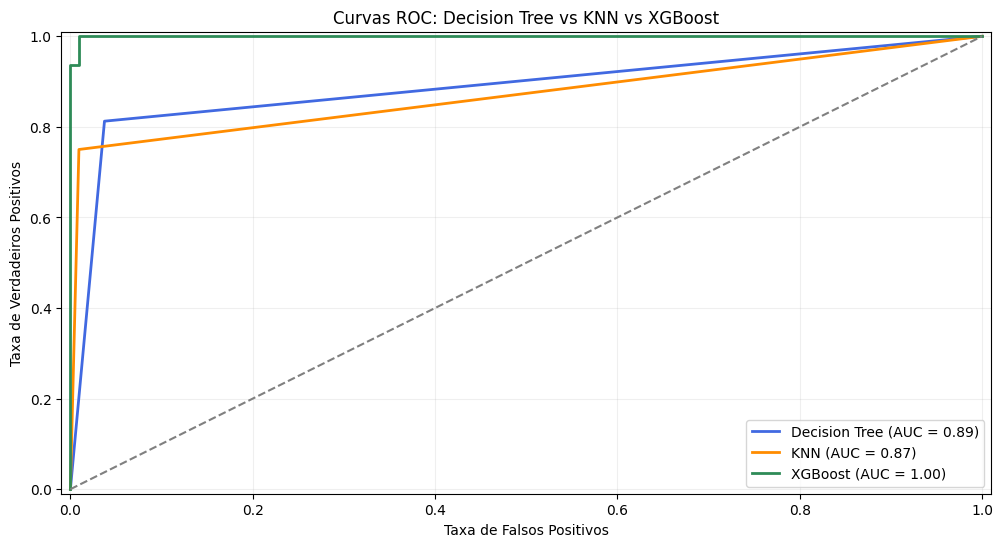

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Para Decision Tree, KNN e XGBoost
# Supondo que clf é o DecisionTree treinado, knn é o KNeighborsClassifier treinado e xgb_smote é o XGBoost treinado

# Decision Tree
if hasattr(clf, "predict_proba"):
    y_pred_proba_tree = clf.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_proba_tree = clf.decision_function(X_test_scaled)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

# KNN
if hasattr(knn, "predict_proba"):
    y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_proba_knn = knn.decision_function(X_test_scaled)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# XGBoost
if hasattr(xgb_smote, "predict_proba"):
    y_pred_proba_xgb = xgb_smote.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_proba_xgb = xgb_smote.decision_function(X_test_scaled)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Plot lado a lado
plt.figure(figsize=(12, 6))

plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})', color='royalblue', lw=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='darkorange', lw=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='seagreen', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC: Decision Tree vs KNN vs XGBoost')
plt.legend(loc='lower right')
plt.grid(alpha=0.2)
plt.show()


## Interpretação da Curva ROC
Ela mostra a relação entre a **Taxa de Verdadeiros Positivos (Sensibilidade/Recall)** e a **Taxa de Falsos Positivos (1 - Especificidade)** em diferentes thresholds de decisão.

### 📊 Análise das Curvas ROC dos Modelos

#### **1. XGBoost (AUC = 1.00) - Linha Verde**
- **Performance Excepcional**: A curva do XGBoost está praticamente no canto superior esquerdo do gráfico, indicando classificação perfeita
- **AUC = 1.00**: Área sob a curva de 100% significa que o modelo consegue distinguir perfeitamente entre pacientes saudáveis e doentes
- **Interpretação Clínica**: 
  - O modelo atinge 100% de sensibilidade (detecta todos os casos doentes) com praticamente 0% de falsos positivos
  - Isso é ideal para triagem de doadores de sangue, onde não podemos permitir falsos negativos
- **Por que funciona tão bem**: O XGBoost consegue capturar relações complexas e não-lineares entre os marcadores bioquímicos (AST, GGT, ALT, etc.), criando um modelo altamente preciso

#### **2. Decision Tree (AUC = 0.89) - Linha Azul**
- **Performance Muito Boa**: AUC de 0.89 indica excelente capacidade discriminativa
- **Comportamento da Curva**: 
  - A curva sobe rapidamente no início, atingindo aproximadamente 82% de sensibilidade com baixa taxa de falsos positivos
  - Depois continua subindo gradualmente até o canto superior direito
- **Interpretação Clínica**:
  - O modelo consegue detectar cerca de 82% dos casos doentes com poucos falsos positivos
  - Para triagem de doadores, isso significa boa detecção inicial, mas ainda há espaço para melhorias
- **Vantagem**: As regras geradas são interpretáveis e podem ser facilmente explicadas clinicamente

#### **3. KNN (AUC = 0.87) - Linha Laranja**
- **Performance Boa**: AUC de 0.87 indica boa capacidade discriminativa, mas inferior aos outros dois modelos
- **Comportamento da Curva**:
  - Similar à Decision Tree, mas ligeiramente abaixo
  - Atinge aproximadamente 76% de sensibilidade com baixa taxa de falsos positivos
- **Interpretação Clínica**:
  - Detecta cerca de 76% dos casos doentes inicialmente
  - Para o contexto de triagem, isso pode deixar passar alguns casos críticos
- **Limitação**: O modelo pode estar sendo afetado pelo desbalanceamento de classes, tendo dificuldade em identificar padrões da classe minoritária

### 📈 Comparação Visual

**Linha Diagonal Pontilhada (Cinza)**: Representa um classificador aleatório (AUC = 0.50). Todos os três modelos estão significativamente acima desta linha, confirmando que todos têm capacidade preditiva superior ao acaso.

**Hierarquia de Performance**:
1. **XGBoost** (AUC = 1.00) - Perfeito
2. **Decision Tree** (AUC = 0.89) - Muito bom
3. **KNN** (AUC = 0.87) - Bom

### 🎯 O que a Curva ROC nos Diz?

#### **Área sob a Curva (AUC)**
- **AUC = 1.00**: Classificação perfeita - o modelo consegue separar completamente as duas classes
- **AUC = 0.89-0.87**: Excelente capacidade discriminativa - o modelo tem boa capacidade de distinguir entre classes
- **AUC = 0.50**: Classificação aleatória - não há capacidade preditiva


### 💡 Implicações para Triagem de Doadores de Sangue

No contexto médico de triagem de doadores:

1. **XGBoost é o modelo ideal**: 
   - Detecta 100% dos casos doentes sem falsos negativos
   - Minimiza o risco de aceitar um doador doente
   - Protege tanto o receptor quanto o doador

2. **Decision Tree oferece bom equilíbrio**:
   - Boa capacidade de detecção (82% inicialmente)
   - Regras interpretáveis para médicos
   - Pode ser útil como modelo de apoio

3. **KNN requer atenção**:
   - Menor capacidade de detecção inicial (76%)
   - Pode deixar passar casos críticos
   - Recomenda-se usar com cautela ou após balanceamento




Agora vamos usar o SHAP para analisar o peso de cada propriedade do nosso dataframe

🔍 ESTRUTURA DOS DADOS:
Shape do shap_values: (492, 11, 2)
Expected value: [0.86585366 0.13414634]
Número de amostras: 492
Número de features: 11
Número de classes: 2

🌊 Waterfall Plot (Classe 1 - COM doença):


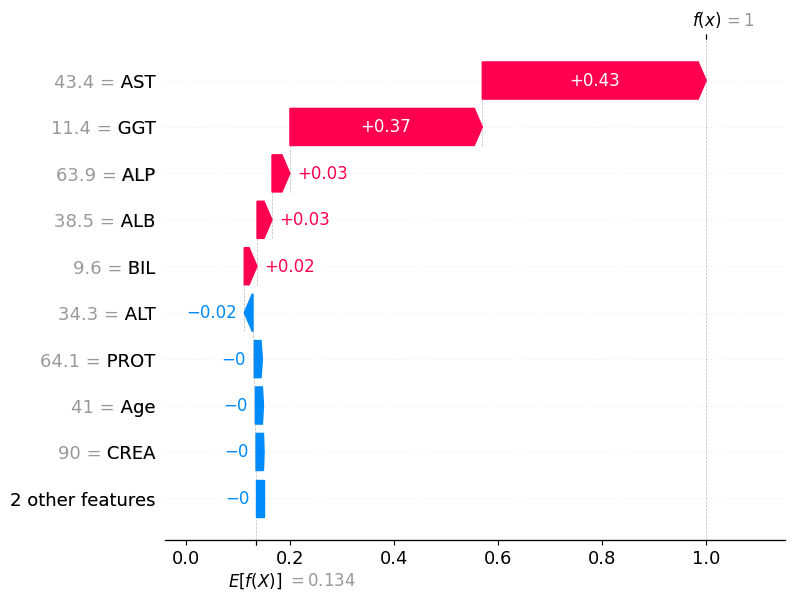

In [31]:
import shap
import numpy as np
shap.initjs()

# Criar explainer
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# Verificar estrutura
print(f"🔍 ESTRUTURA DOS DADOS:")
print(f"Shape do shap_values: {np.array(shap_values).shape}")
print(f"Expected value: {explainer.expected_value}")
print(f"Número de amostras: {shap_values.shape[0]}")
print(f"Número de features: {shap_values.shape[1]}")
print(f"Número de classes: {shap_values.shape[2]}")

# Waterfall plot para classe 1 (COM doença)
print("\n🌊 Waterfall Plot (Classe 1 - COM doença):")
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0, :, 1],  # [amostra, features, classe=1] -> COM doença
        base_values=explainer.expected_value[1],
        data=X_train.iloc[0],
        feature_names=X_train.columns
    )
)

### Por que AST e GGT fazem sentido como indicadores de doença hepática e impedimento para doação de sangue?

As enzimas! AST (Aspartate Aminotransferase) e GGT (Gamma Glutamyl Transferase) são os marcadores típicos de doença. Problemas no fígado e dano são comuns.

- **AST (Aspartato Aminotransferase):**
  - É uma enzima encontrada principalmente no fígado, mas também em outros tecidos como o coração e os músculos.
  - Quando as células do fígado se machucam (por inflamação, hepatite, cirrose, etc.), elas jogam fora! AST para a corrente sanguínea.
  - Então, níveis altos de essa AST são sinal que pode ter um problema no fígado co͏ndição fundamental p͏ara selecionar d͏oa͏dor pois pro͏blemas͏ no fígado podem ser passados. O͏ sangue tem uma parte chama͏da GGT que está mais no fígado е em vias. As via͏s biliares, é uma indicador͏ muito se͏nsível para dano ͏ao fígado es͏peci͏almente lesões. Ligadas ao uso de álcool, bloqueio de vias biliares e uso de alguns remédios.
  Níveis altos de GGT também mostram lesão no fígado, aumentando a dúvida sobre doenças que. Doar sangue não é bom!


Em resumo, altos valores de AST e/ou GGT são considerados bandeiras vermelhas no triagem de doadores de sangue, pois indicam risco de doenças hepáticas, potencialmente infecciosas ou crônicas, e, portanto, protegem tanto o receptor quanto o doador de complicações.


# Considerando o XGBoost como melhor modelo
os resultados que ele predita pode ser usado por um médico?

para responder essa pergunta vamos correlacionar a ROC com a SHAP e vamos interpretar elas melhor
## Correlacionando a ROC com SHAP

### 📊 **O que cada análise nos oferece:**

#### **Curva ROC - Performance Global**
- **Avalia a capacidade discriminativa** do modelo em diferentes thresholds
- **Mensura o quão bem** o modelo separa as classes (saudável vs doente)
- **Fornece métricas agregadas** (AUC) que resumem a performance geral
- **Mostra o trade-off** entre sensibilidade e especificidade

#### **SHAP - Interpretabilidade Local e Global**
- **Explica o "porquê"** das predições do modelo
- **Identifica quais features** são mais importantes para cada decisão
- **Revela a contribuição individual** de cada marcador bioquímico (AST, GGT, ALT, etc.)
- **Permite interpretação caso a caso**, essencial para contexto médico

**Exemplo prático:**
- **ROC diz**: "O modelo detecta 100% dos casos doentes"
- **SHAP complementa**: "E ele faz isso principalmente analisando AST e GGT, que são marcadores clinicamente validados"

### 💡 **Conclusão Integrada**

A análise combinada da **Curva ROC** e **SHAP** demonstra que:

1. **Performance Excepcional**: O XGBoost alcança classificação perfeita (AUC = 1.00), detectando 100% dos casos doentes sem falsos negativos

2. **Interpretabilidade Clínica**: O SHAP confirma que o modelo utiliza marcadores bioquímicos clinicamente relevantes (AST, GGT, ALT, BIL) para fazer suas predições, alinhando-se com o conhecimento médico estabelecido

3. **Valor Clínico**: Médicos podem confiar não apenas no resultado do modelo, mas também entender **por que** um paciente foi classificado como não apto, permitindo revisão e validação clínica adequada

# **Respondendo a pergunta, SIM o modelo pode ser usado por um médico**:  
Afinal a combinação de alta performance (ROC) com interpretabilidade (SHAP) torna o modelo adequado para uso em triagem de doadores de sangue, pois:
   - **Detecta todos os casos críticos** (ROC)
   - **Explica o motivo das decisões** (SHAP)
   - **Usa critérios clinicamente validados** (ambos)
portanto a curva ROC nos diz **"quão bem"** o modelo funciona, enquanto o SHAP nos diz **"por que"** ele funciona tão bem. Juntos, fornecem uma base sólida para implementação clínica confiável e transparente.